# Import necessary libraries

In [6]:
%pip install findspark
%pip install pyspark

Note: you may need to restart the kernel to use updated packages.
  Using cached pyspark-3.5.3.tar.gz (317.3 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840675 sha256=91d6b7ae7db3155fd7778b7aad9432b64f0c91ea9e03b136af1dd7de3625864b
  Stored in directory: c:\users\quan\appdata\local\pip\cache\wheels\1b\3a\92\28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, avg, max, min, count, year, month
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize Spark session

In [8]:

spark = SparkSession.builder \
    .appName("Sales Data Analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [9]:
# Load dataset into Spark DataFrame
data_path = "sales_data_sample.csv"  # Update with actual path
sales_df = spark.read.csv(data_path, header=True, inferSchema=True)

In [10]:
# Data cleansing
# Handle missing values (example: fill missing sales with 0)
sales_df = sales_df.fillna({"Sales": 0})

# Handle duplicates
sales_df = sales_df.dropDuplicates()



In [12]:
sales_df.describe().show()


+-------+------------------+-----------------+-----------------+-----------------+------------------+--------------+---------+------------------+------------------+------------------+------------+------------------+-----------+-----------------+--------------------+--------------------+------------+------------+--------+------------------+---------+---------+---------------+----------------+--------+
|summary|       ORDERNUMBER|  QUANTITYORDERED|        PRICEEACH|  ORDERLINENUMBER|             SALES|     ORDERDATE|   STATUS|            QTR_ID|          MONTH_ID|           YEAR_ID| PRODUCTLINE|              MSRP|PRODUCTCODE|     CUSTOMERNAME|               PHONE|        ADDRESSLINE1|ADDRESSLINE2|        CITY|   STATE|        POSTALCODE|  COUNTRY|TERRITORY|CONTACTLASTNAME|CONTACTFIRSTNAME|DEALSIZE|
+-------+------------------+-----------------+-----------------+-----------------+------------------+--------------+---------+------------------+------------------+------------------+---------

In [14]:
# Display the structure/schema of the DataFrame
sales_df.printSchema()


root
 |-- ORDERNUMBER: integer (nullable = true)
 |-- QUANTITYORDERED: integer (nullable = true)
 |-- PRICEEACH: double (nullable = true)
 |-- ORDERLINENUMBER: integer (nullable = true)
 |-- SALES: double (nullable = false)
 |-- ORDERDATE: string (nullable = true)
 |-- STATUS: string (nullable = true)
 |-- QTR_ID: integer (nullable = true)
 |-- MONTH_ID: integer (nullable = true)
 |-- YEAR_ID: integer (nullable = true)
 |-- PRODUCTLINE: string (nullable = true)
 |-- MSRP: integer (nullable = true)
 |-- PRODUCTCODE: string (nullable = true)
 |-- CUSTOMERNAME: string (nullable = true)
 |-- PHONE: string (nullable = true)
 |-- ADDRESSLINE1: string (nullable = true)
 |-- ADDRESSLINE2: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- POSTALCODE: string (nullable = true)
 |-- COUNTRY: string (nullable = true)
 |-- TERRITORY: string (nullable = true)
 |-- CONTACTLASTNAME: string (nullable = true)
 |-- CONTACTFIRSTNAME: string (nullable = t

In [15]:
# Total sales per product line
product_line_sales = sales_df.groupBy("PRODUCTLINE").agg(sum("SALES").alias("Total_Sales"))
product_line_sales.show()

+----------------+------------------+
|     PRODUCTLINE|       Total_Sales|
+----------------+------------------+
|     Motorcycles| 1166388.340000001|
|    Vintage Cars|1903150.8400000017|
|           Ships| 714437.1300000001|
|Trucks and Buses|        1127789.84|
|    Classic Cars|        3919615.66|
|          Trains|226243.47000000003|
|          Planes| 975003.5699999997|
+----------------+------------------+



C:\Users\QUAN\AppData\Local\Temp\ipykernel_10384\3749392096.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_line_sales_pd, x="PRODUCTLINE", y="Total_Sales", palette="coolwarm")


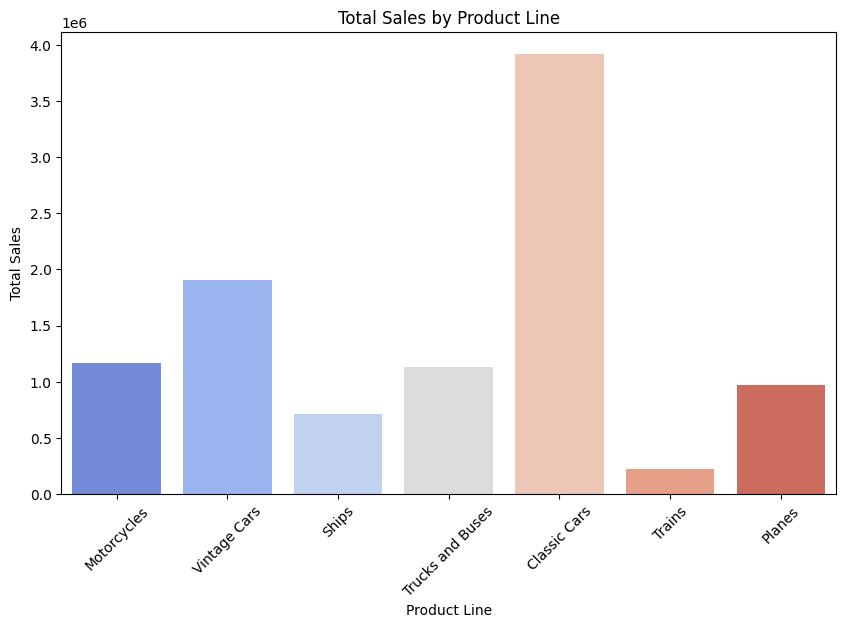

In [16]:
# Convert Spark DataFrame to Pandas for visualization
product_line_sales_pd = product_line_sales.toPandas()
# Visualization: Total sales by product line
plt.figure(figsize=(10, 6))
sns.barplot(data=product_line_sales_pd, x="PRODUCTLINE", y="Total_Sales", palette="coolwarm")
plt.title("Total Sales by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


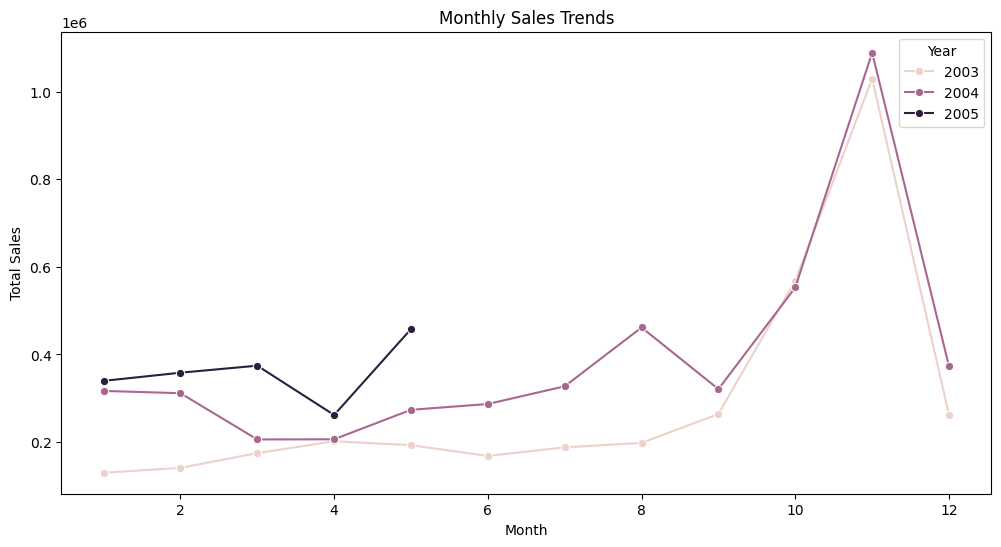

In [17]:
# Monthly Sales Trends
monthly_sales = sales_df.groupBy("YEAR_ID", "MONTH_ID").agg(sum("SALES").alias("Monthly_Sales"))
monthly_sales_pd = monthly_sales.orderBy("YEAR_ID", "MONTH_ID").toPandas()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_pd, x="MONTH_ID", y="Monthly_Sales", hue="YEAR_ID", marker="o")
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title="Year")
plt.show()

In [18]:
# Feature Engineering: Create a new column for profit margin (example)
# Assuming MSRP is Manufacturer Suggested Retail Price
sales_df = sales_df.withColumn("ProfitMargin", col("MSRP") - col("PRICEEACH"))
sales_df.select("PRODUCTLINE", "ProfitMargin").show(5)


+------------+------------+
| PRODUCTLINE|ProfitMargin|
+------------+------------+
|Vintage Cars|         1.0|
|Vintage Cars|       -35.0|
|Vintage Cars|       -13.0|
|Vintage Cars|         2.0|
|      Planes|        9.54|
+------------+------------+
only showing top 5 rows



C:\Users\QUAN\AppData\Local\Temp\ipykernel_10384\4058615557.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers_pd, x="Total_Sales", y="CUSTOMERNAME", palette="viridis")


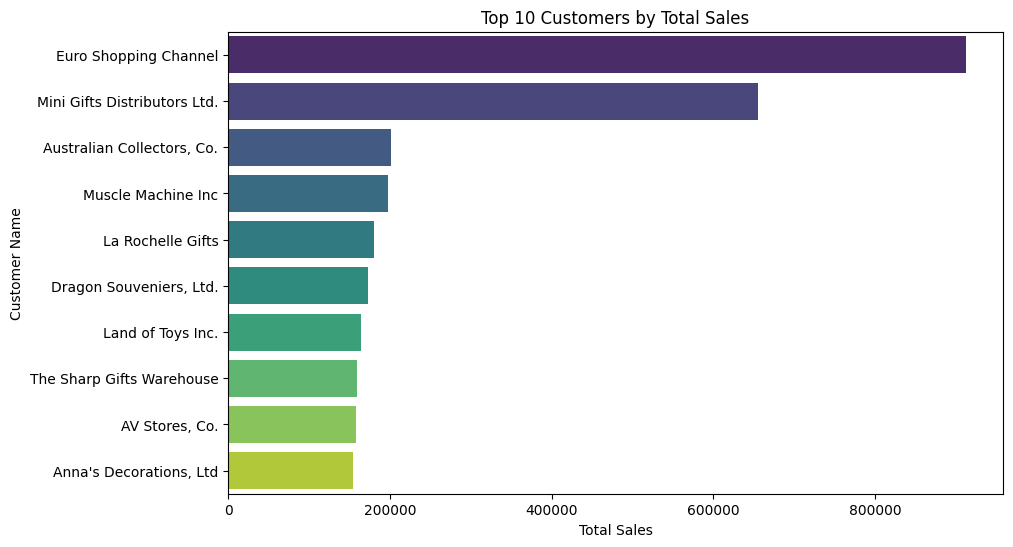

In [19]:
# Advanced Analytics: Top Customers by Total Sales
customer_sales = sales_df.groupBy("CUSTOMERNAME").agg(sum("SALES").alias("Total_Sales"))
top_customers = customer_sales.orderBy(col("Total_Sales").desc()).limit(10)
top_customers_pd = top_customers.toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers_pd, x="Total_Sales", y="CUSTOMERNAME", palette="viridis")
plt.title("Top 10 Customers by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Customer Name")
plt.show()

In [22]:
# Stop Spark session
spark.stop()